# Laboratorio 2

## Grupo 16:
- Mateo Parra - 20... - Estudiante 
- Juan Felipe Puig - 202221336 - Estudiante 1
- Nicolas - - 


Objetivo principal de FinanzasAlpes: Se busca segmentar a sus clientes según su comportamiento de compra en centros comerciales, con el objetivo de identificar los distintos perfiles de tarjetahabientes. 

## 1. Preparación de datos

Como primer paso importamos todas las herramientas que necesitamos para el desarrollo del entendimiento, perfilamiento y modelado

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

Ahora cargamos los datos y los copiamos en una variable diferente para no modificar los originales

In [230]:
# Se cargan los datos. 
df_data=pd.read_csv('./202510_Laboratorio 2 - Agrupación_Customer_Data.csv', sep=';', encoding = 'ISO-8859-1', index_col=0)
df=df_data.copy()

### 1.1 Entendimiento de Datos

Revisamos el tamaño de los datos para ver cuantas filas tenemos y cuantas columnas

In [231]:
df.shape

(8950, 17)

Imprimimos las primeras filas para ver mas a detalle unos ejemplos de como se estructuran las filas y columnas

In [232]:
df.head()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
ID,,,,,,,,,,,,,,,,,
C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


Ahora revisamos la informacion de cada columna y los tipos de dato que contienen. Los verificamos con el diccionario para ver si hay consistencia y logica con los valores

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C18950
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SALDO                8950 non-null   float64
 1   F_SALDO              8950 non-null   float64
 2   COMPRAS              8950 non-null   float64
 3   COMPRAS_PUNTUALES    8950 non-null   float64
 4   COMPRAS_PLAZOS       8950 non-null   float64
 5   AVANCE_EFECTIVO      8950 non-null   float64
 6   F_COMPRAS            8950 non-null   float64
 7   F_COMPRAS_PUNTUALES  8950 non-null   float64
 8   F_COMPRAS_PLAZOS     8950 non-null   float64
 9   F_AVANCE_EFECTIVO    8950 non-null   float64
 10  P_AVANCE_EFECTIVO    8950 non-null   int64  
 11  P_COMPRAS            8950 non-null   int64  
 12  LÍMITE_CREDITO       8949 non-null   float64
 13  PAGOS                8950 non-null   float64
 14  PAGOS_MINIMOS        8637 non-null   float64
 15  F_PAGOS_COMPLETOS    8950 non-null  

Como vemos que todos los datos son numericos int o float, entonces aplicamos el describe para datos mas a detalle y poder ver si hay algun negativo o un valor anormal segun el diccionario.

In [234]:
df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Ahora imprimimos diagramas de caja para todas las variables y ver si tienen datos anormales o fuera de su media. Observamos que la mayoria mantiene consistencia pero en algunas si hay datos que se salen ya sea por arriba o por abajo de los cuartiles.

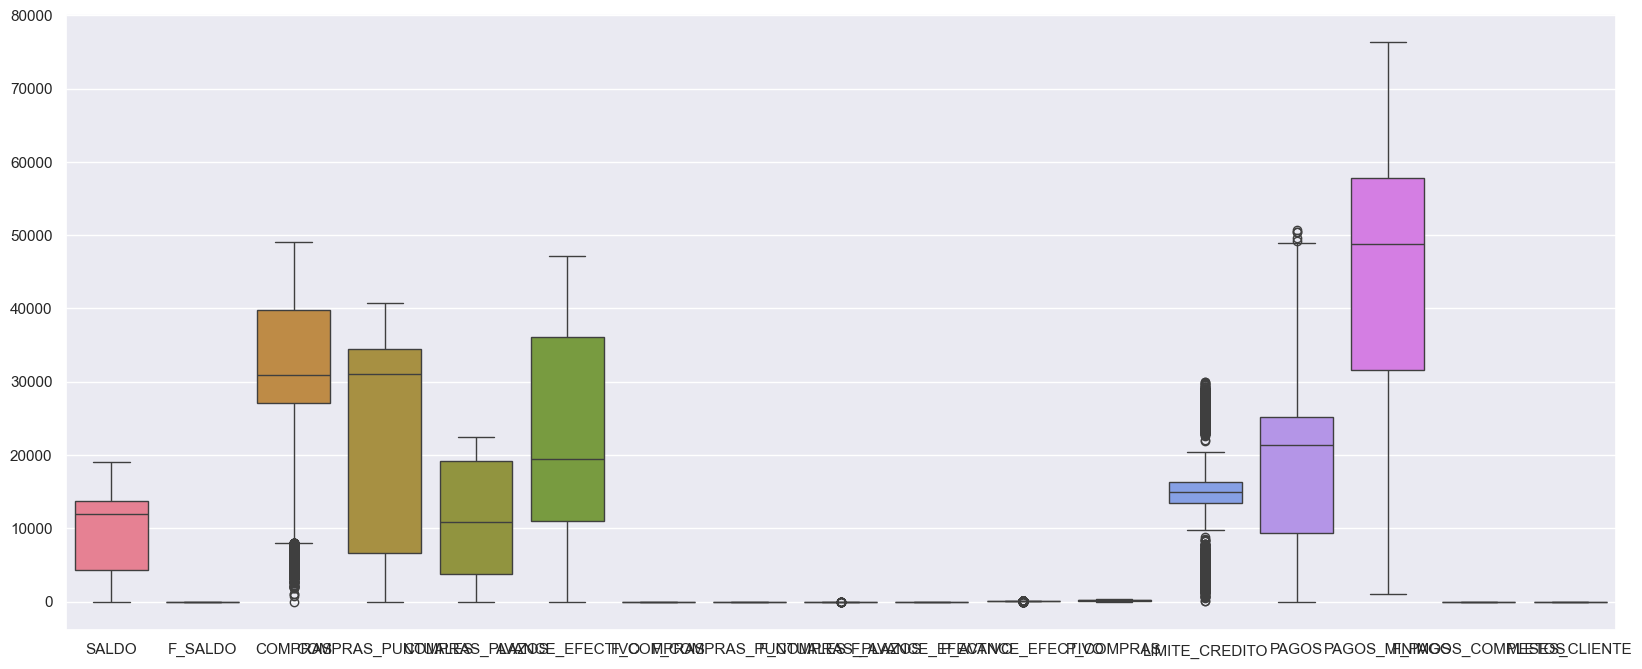

In [235]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

In [236]:
name_cols_float = df.select_dtypes(include = ['float']).columns
name_cols_int = df.select_dtypes(include = ['int64']).columns
name_cols_int


Index(['P_AVANCE_EFECTIVO', 'P_COMPRAS', 'MESES_CLIENTE'], dtype='object')

Para tener mayor claridad y visibilidad de los datos, los separamos en los de tipo int y los de tipo float

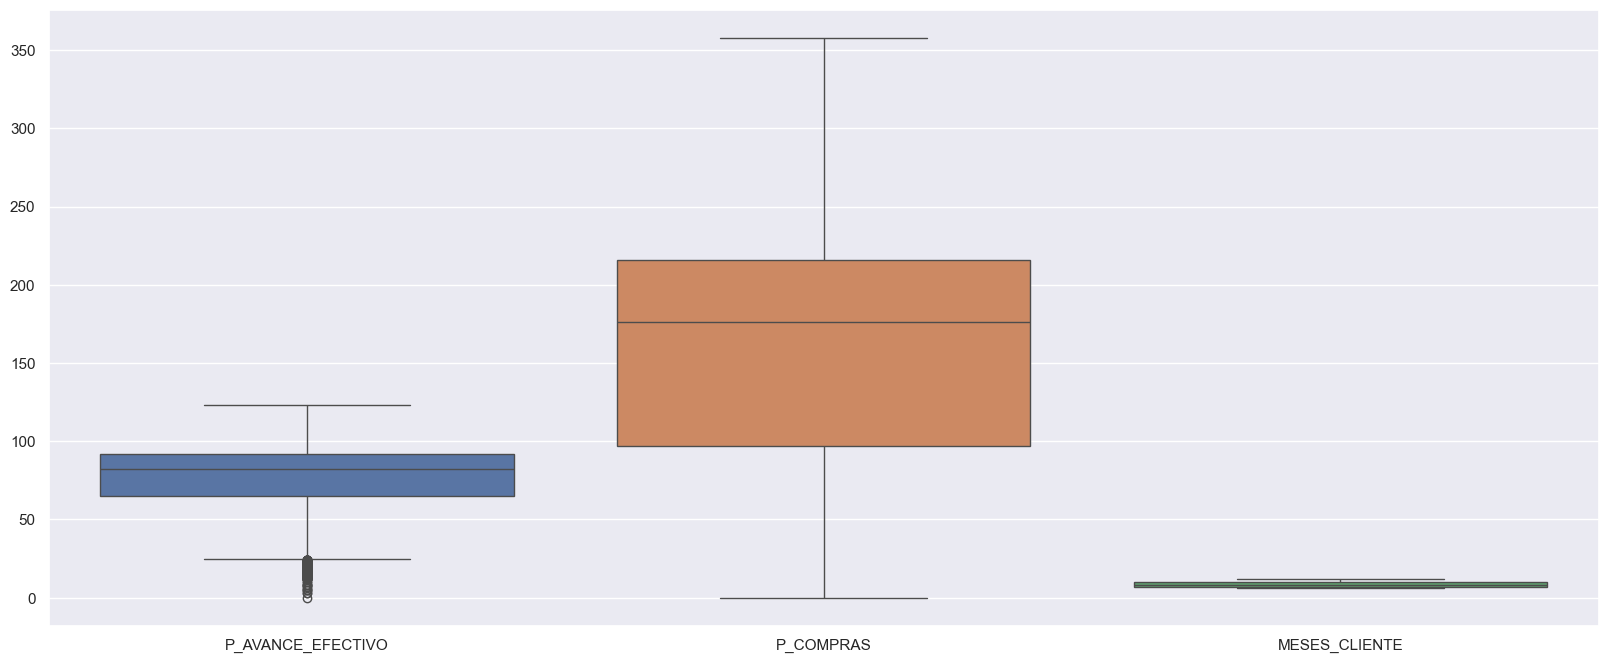

In [237]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df[name_cols_int], orient="v")

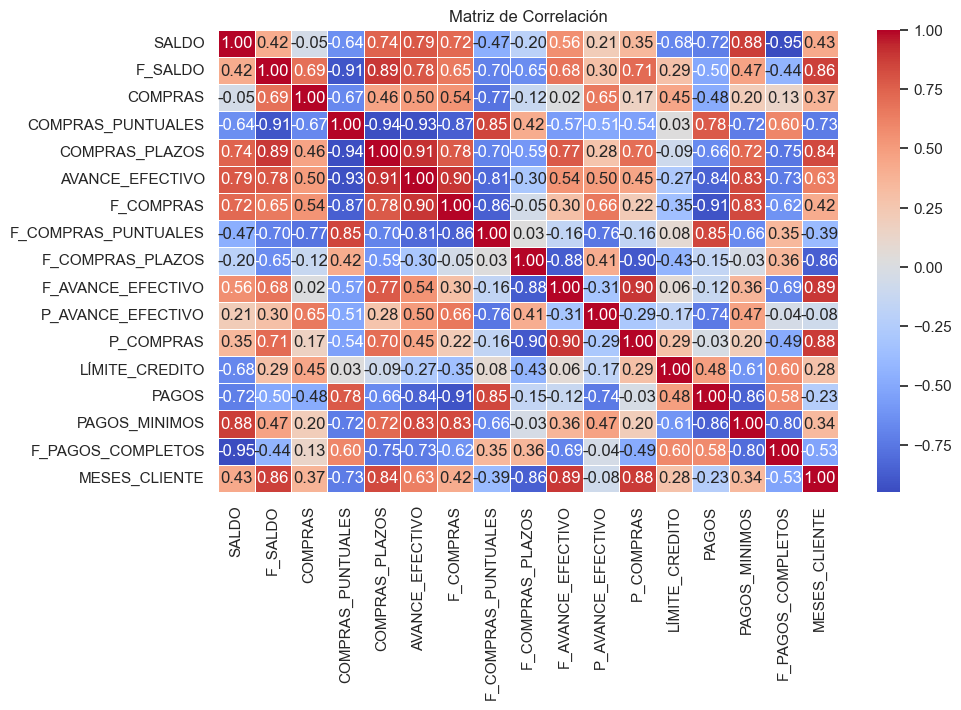

In [238]:
corr_matrix = df.select_dtypes(include=["number"]).corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

Con la siguiente matriz de correlacion podemos empezar a perfilar cuales seran las columnas que nos serviran para el modelo y cuales nos pueden afectar
la precision de esta. Vemos que COMPRAS_PLAZOS, AVANCE_EFECTIVO Y F_COMPRAS estan bastante relacionadas entre ellas entonces no seria recomendable escogerlas a las 3 para el modelo. Es preferible solo escoger una de ellas y nos vamos mejor con COMPRAS_PLAZOS. En la grafica podemos ver que esa variable tiene tambien alta correlacion con F_PLAZOS ya que representan cosas similares, por ende tambien se descarta para el modelo.

### Correlaciones altas (≥0.75)
SALDO y COMPRAS_PLAZOS (0.74):
Clientes con mayor saldo disponible hacen más compras a plazos.
Usuarios con buena capacidad de pago prefieren financiar sus compras en cuotas en lugar de pagarlas al contado.

COMPRAS_PUNTUALES y COMPRAS_PLAZOS (0.94)
Los que compran más a plazos también tienen un alto número de compras puntuales.
Algunos clientes pueden dividir sus gastos entre compras puntuales y a plazos, lo que indica un alto consumo.

AVANCE_EFECTIVO y COMPRAS_PLAZOS (0.91)
Clientes que hacen avances en efectivo también tienden a usar compras a plazos con frecuencia.
Personas que dependen del crédito para cubrir sus gastos de salud.

PAGOS y AVANCE_EFECTIVO (0.84)
Quienes hacen más pagos también recurren más a avances en efectivo.
Existe un segmento de usuarios que hacen pagos frecuentes, pero también tienen alta dependencia de adelantos en efectivo.

F_COMPRAS_PUNTUALES y COMPRAS_PLAZOS (0.85)
Frecuencia de compras puntuales y compras a plazos están altamente correlacionadas.
Aquellos que compran a plazos también hacen muchas compras puntuales.

### Correlaciones negativas altas (≤ -0.5)
SALDO y COMPRAS_PUNTUALES (-0.64)
A mayor saldo disponible, menor cantidad de compras puntuales.
Personas con menos saldo disponible pueden evitar compras grandes y optar por pagos inmediatos en vez de compras a crédito.

LÍMITE_CRÉDITO y SALDO (-0.68)
Clientes con mayor crédito disponible tienen menor saldo en su cuenta.
Podría indicar que estos clientes dependen más del crédito y no manejan altos saldos en sus cuentas.

F_PAGOS_COMPLETOS y P_AVANCE_EFECTIVO (-0.49)
Quienes pagan a tiempo suelen hacer menos avances en efectivo.
Indica que los clientes que pueden pagar sus cuentas completas no recurren a adelantos de efectivo, mostrando una mejor salud financiera.

### Analisis de correlaciones entre las columnas:

### 1.2 Perfilamiento

Primero revisamos la cantidad de duplicados en todas las filas para ver si es necesario hacer un ajuste con estas

In [239]:
df.duplicated(keep = False).sum()

0

Ahora revisamos la completitud de las filas y buscamos las que tengan algun valor nulo o faltante

In [240]:
df.isnull().sum()

SALDO                    0
F_SALDO                  0
COMPRAS                  0
COMPRAS_PUNTUALES        0
COMPRAS_PLAZOS           0
AVANCE_EFECTIVO          0
F_COMPRAS                0
F_COMPRAS_PUNTUALES      0
F_COMPRAS_PLAZOS         0
F_AVANCE_EFECTIVO        0
P_AVANCE_EFECTIVO        0
P_COMPRAS                0
LÍMITE_CREDITO           1
PAGOS                    0
PAGOS_MINIMOS          313
F_PAGOS_COMPLETOS        0
MESES_CLIENTE            0
dtype: int64

In [241]:
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

PAGOS_MINIMOS          0.034972
LÍMITE_CREDITO         0.000112
SALDO                  0.000000
F_AVANCE_EFECTIVO      0.000000
F_PAGOS_COMPLETOS      0.000000
PAGOS                  0.000000
P_COMPRAS              0.000000
P_AVANCE_EFECTIVO      0.000000
F_COMPRAS_PLAZOS       0.000000
F_SALDO                0.000000
F_COMPRAS_PUNTUALES    0.000000
F_COMPRAS              0.000000
AVANCE_EFECTIVO        0.000000
COMPRAS_PLAZOS         0.000000
COMPRAS_PUNTUALES      0.000000
COMPRAS                0.000000
MESES_CLIENTE          0.000000
dtype: float64

Como los pagos minimos tienen bastantes filas en nulo, es mejor rellenarlas don la mediana

In [242]:
df['PAGOS_MINIMOS'] = df['PAGOS_MINIMOS'].fillna(df['PAGOS_MINIMOS'].median())

Como limite de credito solo tiene un valor nulo, se puede eliminar

In [243]:
df = df.dropna(subset=['LÍMITE_CREDITO']).copy()

Revisamos la consistencia y validez buscando si hay valores negativos que no tengan sentido con la logica de las columnas y su significado en el diccionario

In [244]:
df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,9382.834407,0.459235,30525.813963,22911.925086,11408.535114,22575.147465,0.559820,0.478039,0.623883,0.735001,76.169069,164.992401,14696.640361,19824.032376,44383.757291,0.545381,8.370879
std,5118.225213,0.283000,11042.026468,13573.678604,7087.204157,12594.004702,0.214065,0.221885,0.208196,0.422554,22.262177,71.318466,5537.074673,11069.846617,15218.718686,0.267439,1.755955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.010013,0.188477,27106.472380,6697.909592,3736.518761,10944.491280,0.407258,0.250843,0.518226,0.230708,65.000000,97.000000,13487.727310,9328.612544,31854.632150,0.336728,7.000000
50%,12008.971240,0.306857,30934.348710,31007.815260,10832.156800,19466.599750,0.505421,0.533530,0.607518,0.947666,82.000000,176.000000,14942.545350,21365.739030,48780.271750,0.432656,8.000000
75%,13740.607830,0.756063,39825.766500,34494.807700,19127.092810,36150.771250,0.777087,0.649153,0.814920,1.029179,92.000000,216.000000,16269.727120,25220.148260,57527.852280,0.815172,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Al revisar la fila de minimo podemos ver que ninguno baja de 0

### 1.3 Variables seleccionadas

Despues del analisis estas son las variables que mas se ajustan y perfilan para poder ser usadas en el modelo. Esto por su correlacion, calidad y coherencia frente al proposito y objetivo principal del ministerio. (Mas adelante pueden cambiar para perfeccionar el modelo)

In [245]:
seleccionadas = ["SALDO", "COMPRAS", "COMPRAS_PLAZOS", 
            "AVANCE_EFECTIVO", "LÍMITE_CREDITO", "PAGOS", "F_COMPRAS_PUNTUALES", "F_PAGOS_COMPLETOS"]

## 2. Modelamiento: 

### Primer Modelo: BIRCH (Juan Puig)

Para el primer modelo vamos a escoger el modelo de BIRCH. Este es un metodo de reducción iterativa equilibrada y agrupación utilizando jerarquías. Su proposito principal es minimizar la distancia general entre los registros y sus agrupaciones. Como primer acercamiento lo ejecutamos con los datos generales
para ver que nos retorna.

In [246]:
df_birch= df.copy()

Podemos ver que el primer resultado es muy bueno y funciona bastante bien con los datos que nos dan. Sin embargo, solo es el primer acercamiento. Ahora debemos hacerlo con todos los datos que ajustamos y seleccionamos

In [247]:
from sklearn.cluster import SpectralClustering, OPTICS, Birch, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score

df_numeric = df[seleccionadas].select_dtypes(include=['number']) 
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)  
algorithms = {
    "Birch": Birch(n_clusters=4),
}

for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X)
        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else np.inf
        print(f"{name} - Silhouette Score: {silhouette:.4f}, Davies-Bouldin Index: {davies_bouldin:.4f}")
    except Exception as e:
        print(f"{name} falló: {e}")

Birch - Silhouette Score: 0.7840, Davies-Bouldin Index: 0.3144


En este punto podemos ver que los resultados al ponerlos con las columnas seleccionadas mejoran en comparacion a usarlo con todos los datos. Sin embargo,
volviendo a analizar las columnas seleccionadas hay 2 que pueden mostrar cierta redundancia al modelo, por lo que las eliminamos y escogemos solo las siguientes:

In [272]:
seleccionadas = ["SALDO", "COMPRAS", "COMPRAS_PLAZOS", 
            "AVANCE_EFECTIVO", "LÍMITE_CREDITO", "PAGOS"]

In [273]:
df_numeric = df[seleccionadas].select_dtypes(include=['number']) 
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)  
algorithms = {
    "Birch": Birch(n_clusters=4),
}

for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X)
        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else np.inf
        print(f"{name} - Silhouette Score: {silhouette:.4f}, Davies-Bouldin Index: {davies_bouldin:.4f}")
    except Exception as e:
        print(f"{name} falló: {e}")

Birch - Silhouette Score: 0.8034, Davies-Bouldin Index: 0.2843


Lo corremos con estas columnas y los valores mejoran significativamente. El puntaje de silueta aumento y el indice de Davies-Bouldin disminuyo. Por esto mandentremos estas nuevas columnas seleccionadas para los demas modelos

1. Mejor Silhouette Score → 0.8034 (indica buena separación entre clusters).

2. Menor Davies-Bouldin Index → 0.2843 (clusters más compactos y menos solapados).

Ya teniendo estos resultados del modelo vamos a entrar mas en detalle de que nos devuelve, los cluster y como se distribuyen los datos segun sus caracteristicas

In [274]:
df_birch= df[seleccionadas].copy()

In [275]:
X = df[seleccionadas]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mean_shift = Birch(n_clusters=4)
clusters = mean_shift.fit_predict(X_scaled)

df_birch["Cluster"] = clusters

cluster_counts = df_birch["Cluster"].value_counts()

print("Número de clientes por cluster:")
print(cluster_counts)

Número de clientes por cluster:
Cluster
2    3481
1    3283
0    1247
3     938
Name: count, dtype: int64


Vemos que nos retorna 4 clusters de agrupacion, cada uno con una cantidad alta de datos. No estan distribuidos equitativamente pero la diferencia no es exageradamente alta y ya trataremos de analizar por que.

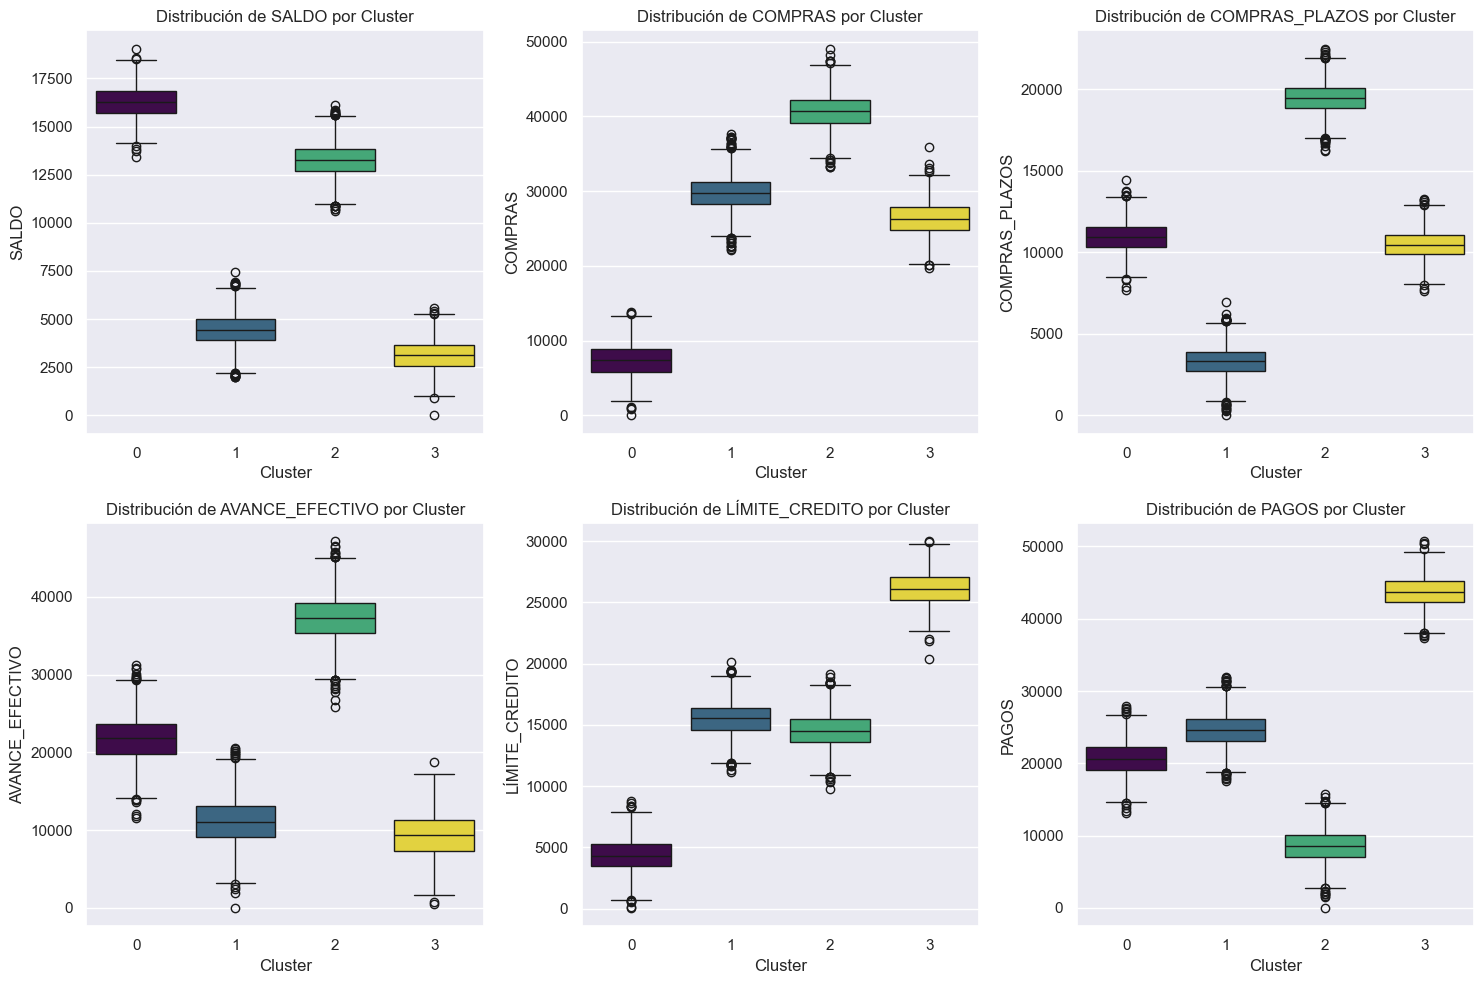

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(seleccionadas)

n_rows = (num_features // 3) + (1 if num_features % 3 != 0 else 0)
n_cols = 3
plt.figure(figsize=(15, 5 * n_rows)) 

for i, feature in enumerate(seleccionadas):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df_birch["Cluster"], y=df_birch[feature], hue=df_birch["Cluster"], palette="viridis", legend=False)
    plt.title(f"Distribución de {feature} por Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)

plt.tight_layout() 
plt.show()

Cluster 0 (Morado): Clientes con restricciones financieras
Bajo límite de crédito.
Alto uso de avances en efectivo.
Compras y pagos bajos.
Perfil: Clientes que dependen del efectivo y tienen acceso limitado a crédito.

Cluster 1 (Azul): Clientes financieros equilibrados
Compras y avances en efectivo moderados.
Límite de crédito medio.
Pagos consistentes.
Perfil: Clientes con estabilidad financiera, usan crédito y pagan de manera regular.

Cluster 2 (Verde): Clientes premium y activos
Alto saldo en cuenta.
Elevado uso de crédito y avances en efectivo.
Pagos altos.
Perfil: Clientes con alta capacidad financiera y uso activo de productos de crédito.

Cluster 3 (Amarillo): Clientes confiables con acceso a crédito alto
Límite de crédito más alto del grupo.
Muchas compras a plazos y pagos elevados.
Perfil: Clientes con buen historial crediticio, confianza bancaria y acceso a crédito amplio.

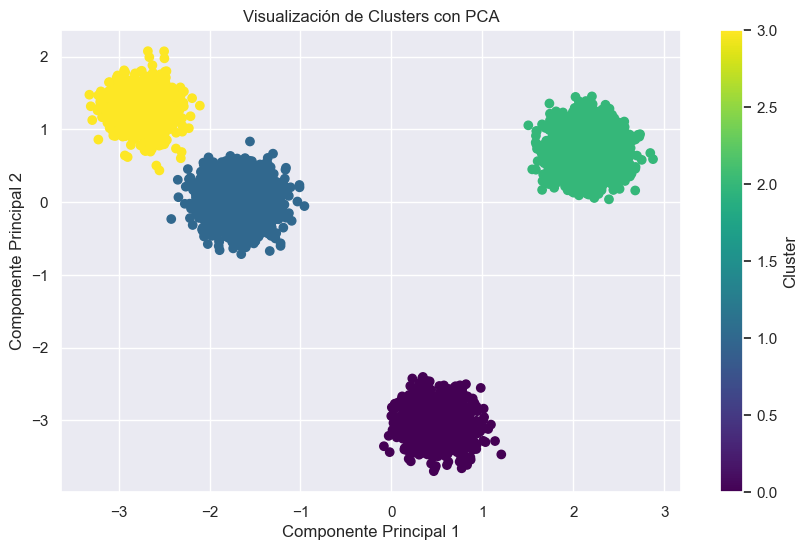

In [277]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_birch["Cluster"], cmap='viridis', marker='o')
plt.title("Visualización de Clusters con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()

In [278]:
import pandas as pd

cluster_means = df_birch.groupby("Cluster")[seleccionadas].mean()
for cluster, means in cluster_means.iterrows():
    print(f"\nCluster {cluster}:")
    for feature, mean_value in means.items():
        print(f"- {feature}: {mean_value:.2f}")


Cluster 0:
- SALDO: 16287.01
- COMPRAS: 7392.85
- COMPRAS_PLAZOS: 10930.97
- AVANCE_EFECTIVO: 21758.73
- LÍMITE_CREDITO: 4364.17
- PAGOS: 20649.27

Cluster 1:
- SALDO: 4451.74
- COMPRAS: 29752.28
- COMPRAS_PLAZOS: 3313.34
- AVANCE_EFECTIVO: 11127.11
- LÍMITE_CREDITO: 15524.06
- PAGOS: 24627.58

Cluster 2:
- SALDO: 13249.98
- COMPRAS: 40669.37
- COMPRAS_PLAZOS: 19462.50
- AVANCE_EFECTIVO: 37230.72
- LÍMITE_CREDITO: 14538.13
- PAGOS: 8557.50

Cluster 3:
- SALDO: 3111.77
- COMPRAS: 26343.07
- COMPRAS_PLAZOS: 10487.65
- AVANCE_EFECTIVO: 9340.56
- LÍMITE_CREDITO: 26125.16
- PAGOS: 43725.62


Estos datos nos dan un acercamiento mayor a los valores que vuelven y confirman el analisis que le dimos a los diagramas de cajas

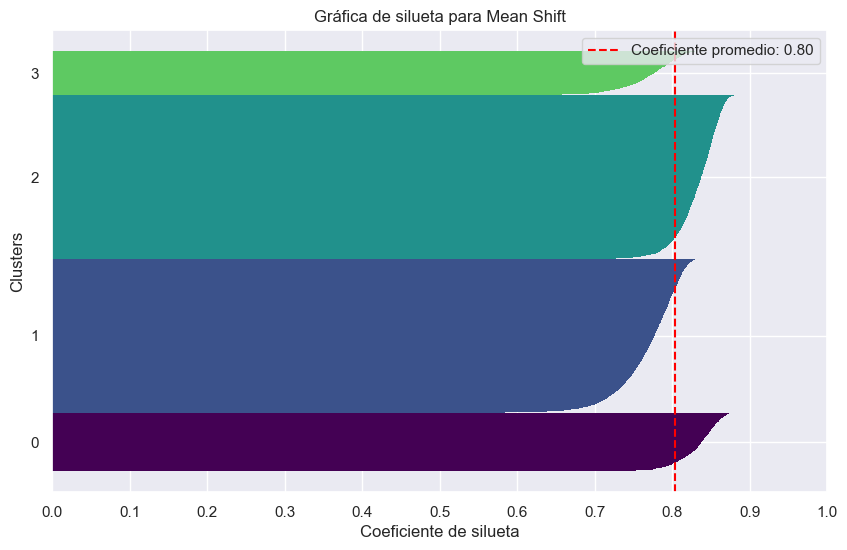

In [279]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def plot_silhouette(data, labels, ylabel='Clusters', xlabel='Coeficiente de silueta', title='Gráfica de silueta para Mean Shift'):
    
    cluster_labels = np.unique(labels)
    n_clusters = len(cluster_labels)
    silhouette_vals = silhouette_samples(data, labels, metric='euclidean')
    plt.figure(figsize=(10, 6))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.viridis(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    
    plt.axvline(silhouette_avg, color="red", linestyle="--", label=f'Coeficiente promedio: {silhouette_avg:.2f}')
    plt.yticks(yticks, cluster_labels)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.legend(loc='upper right')
    plt.show()

plot_silhouette(X_scaled, df_birch["Cluster"])

Coeficiente promedio: 0.80
Es un valor alto, lo que indica que los clusters están bien definidos y separados.
Los puntos dentro de cada cluster están más cerca entre sí que de otros clusters.

Forma y tamaño de los clusters
Los clusters tienen un ancho considerable y coeficientes de silueta altos, lo que sugiere que la mayoría de las asignaciones son adecuadas.
El cluster 0 tiene una menor amplitud, lo que puede indicar menor cohesión o menos datos asignados.

## Modelo 2: Mean Shift

In [256]:
df_numeric = df[seleccionadas].select_dtypes(include=['number']) 
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)  
algorithms = {
    "MeanShift": MeanShift(),
}

for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X)
        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else np.inf
        print(f"{name} - Silhouette Score: {silhouette:.4f}, Davies-Bouldin Index: {davies_bouldin:.4f}")
    except Exception as e:
        print(f"{name} falló: {e}")

MeanShift - Silhouette Score: 0.8034, Davies-Bouldin Index: 0.2843


In [257]:
df_mean= df[seleccionadas].copy()

In [258]:
X = df[seleccionadas]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mean_shift = MeanShift()
clusters = mean_shift.fit_predict(X_scaled)

df_mean["Cluster"] = clusters

cluster_counts = df_mean["Cluster"].value_counts()

print("Número de clientes por cluster:")
print(cluster_counts)

Número de clientes por cluster:
Cluster
0    3481
1    3283
2    1247
3     938
Name: count, dtype: int64


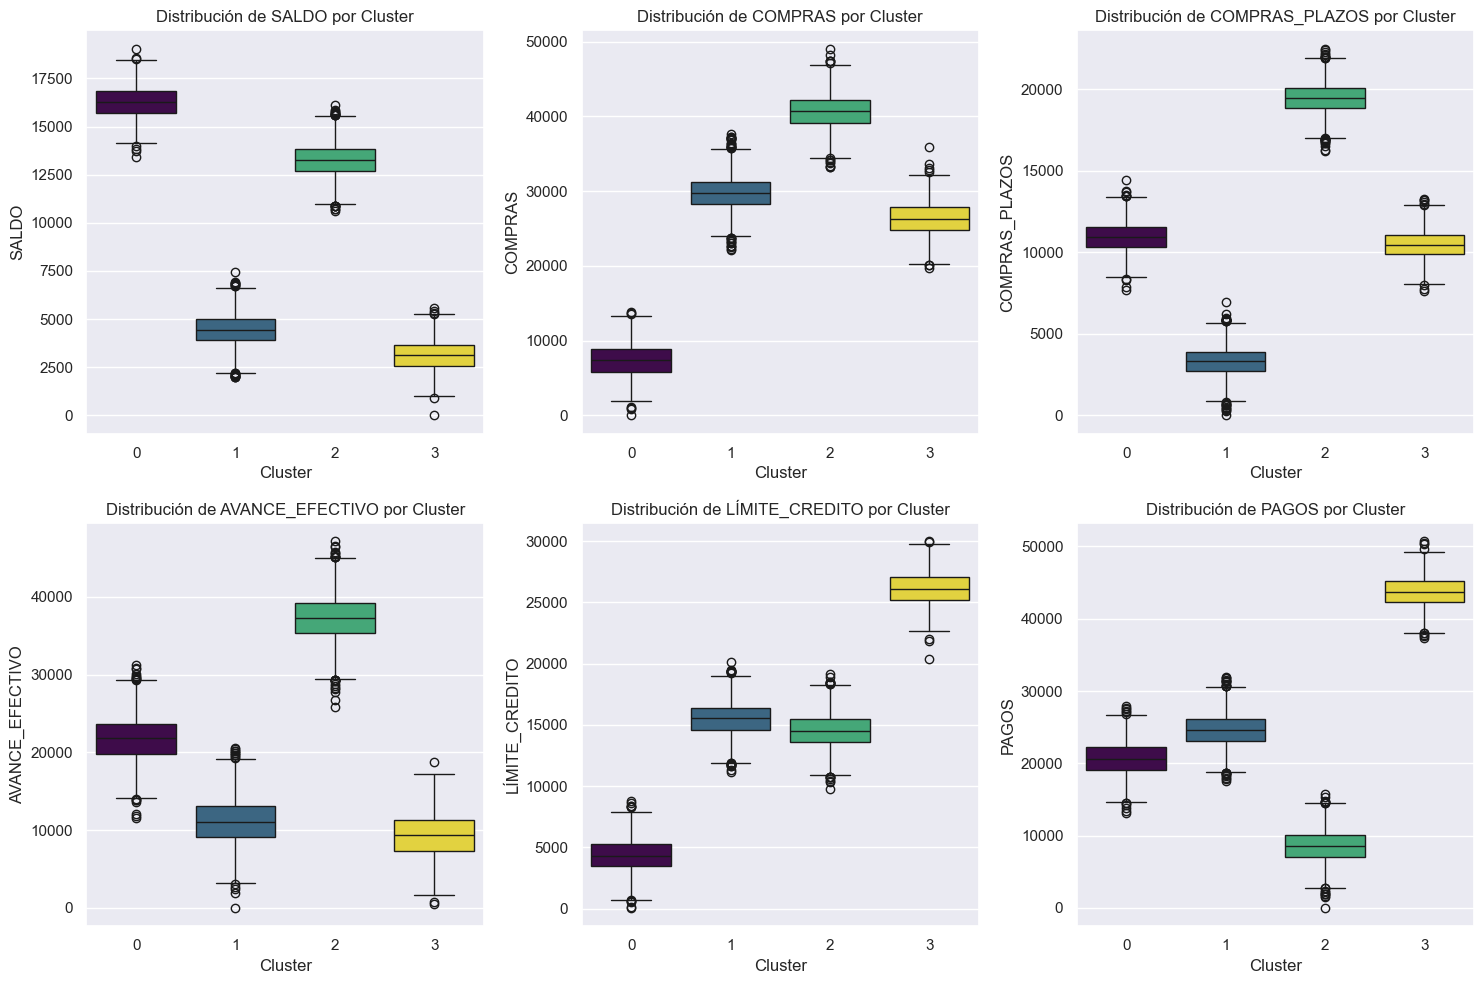

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(seleccionadas)

n_rows = (num_features // 3) + (1 if num_features % 3 != 0 else 0)
n_cols = 3
plt.figure(figsize=(15, 5 * n_rows)) 

for i, feature in enumerate(seleccionadas):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df_birch["Cluster"], y=df_birch[feature], hue=df_birch["Cluster"], palette="viridis", legend=False)
    plt.title(f"Distribución de {feature} por Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)

plt.tight_layout() 
plt.show()

Cada gráfico muestra la distribución de una variable clave en los diferentes clusters (0, 1, 2, 3).

Cluster 0 (Color morado)
Saldo: Bajo, en el rango de 3,000 - 15,000.
Compras: Muy alto, en el rango de 30,000 - 50,000.
Compras a plazos: Extremadamente altas (~20,000 en mediana).
Avance en efectivo: El más alto de todos (~40,000 en mediana).
Límite de crédito: Medio (~12,000 - 20,000).
Pagos: Bajo, en comparación con su alto consumo.
Interpretación:
- "Clientes endeudados" o "clientes dependientes del crédito".
- Hacen muchas compras a plazos y avances en efectivo, pero tienen bajos pagos y saldo limitado.
- Probablemente sean clientes con dificultades financieras o que usan crédito constantemente para compras médicas.
- Posible riesgo de impago.

Cluster 1 (Color azul)
Saldo: Medio, en el rango 3,000 - 10,000.
Compras: Alto (~20,000 - 35,000).
Compras a plazos: Moderado (~5,000 mediana).
Avance en efectivo: Bajo a medio (~7,000 - 12,000).
Límite de crédito: Medio (~12,000 - 20,000).
Pagos: Medio (~20,000 - 30,000).
Interpretación:
- "Clientes con gastos moderados y pagos estables".
- Realizan compras frecuentes y usan algo de financiamiento, pero su saldo y pagos son adecuados.
- Clientes con buena capacidad de pago, pero con tendencia a endeudarse.
- Podrían beneficiarse de planes de fidelización o descuentos en sus pagos a tiempo.

Cluster 2 (Color verde)
Saldo: Alto (~15,000 - 20,000).
Compras: Bajas (~5,000 - 15,000).
Compras a plazos: Medio (~10,000 mediana).
Avance en efectivo: Bajo (~5,000 mediana).
Límite de crédito: Muy bajo (~3,000 - 10,000).
Pagos: Medio (~20,000 - 30,000).
Interpretación:
- "Clientes con buen saldo, pero poco uso de crédito y compras menores."
- No usan avances en efectivo y su límite de crédito es bajo.
- Podrían ser clientes que tienen fondos suficientes para evitar compras a crédito.

Cluster 3 (Color amarillo)
Saldo: Muy bajo (~2,500 - 5,000).
Compras: Bajas (~10,000).
Compras a plazos: Medio (~8,000 - 12,000).
Avance en efectivo: Bajo (~5,000 mediana).
Límite de crédito: El más alto (~25,000 - 30,000).
Pagos: El más alto (~40,000 - 50,000).
Interpretación:
- "Clientes con alto límite de crédito y buenos hábitos de pago."
- Hacen compras más pequeñas y usan crédito de manera moderada.
- Probablemente usuarios con mejor historial financiero, permitiéndoles acceder a más crédito.

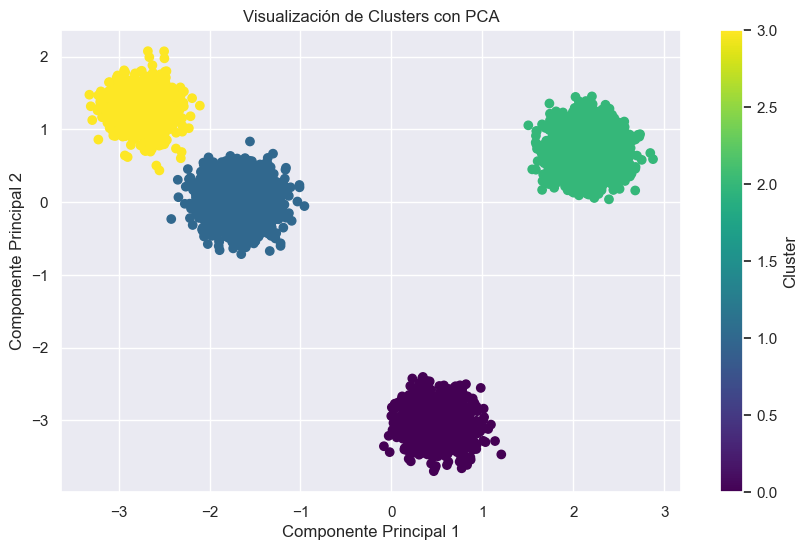

In [260]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_birch["Cluster"], cmap='viridis', marker='o')
plt.title("Visualización de Clusters con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()

In [261]:
import pandas as pd

cluster_means = df_birch.groupby("Cluster")[seleccionadas].mean()
for cluster, means in cluster_means.iterrows():
    print(f"\nCluster {cluster}:")
    for feature, mean_value in means.items():
        print(f"- {feature}: {mean_value:.2f}")


Cluster 0:
- SALDO: 16287.01
- COMPRAS: 7392.85
- COMPRAS_PLAZOS: 10930.97
- AVANCE_EFECTIVO: 21758.73
- LÍMITE_CREDITO: 4364.17
- PAGOS: 20649.27

Cluster 1:
- SALDO: 4451.74
- COMPRAS: 29752.28
- COMPRAS_PLAZOS: 3313.34
- AVANCE_EFECTIVO: 11127.11
- LÍMITE_CREDITO: 15524.06
- PAGOS: 24627.58

Cluster 2:
- SALDO: 13249.98
- COMPRAS: 40669.37
- COMPRAS_PLAZOS: 19462.50
- AVANCE_EFECTIVO: 37230.72
- LÍMITE_CREDITO: 14538.13
- PAGOS: 8557.50

Cluster 3:
- SALDO: 3111.77
- COMPRAS: 26343.07
- COMPRAS_PLAZOS: 10487.65
- AVANCE_EFECTIVO: 9340.56
- LÍMITE_CREDITO: 26125.16
- PAGOS: 43725.62


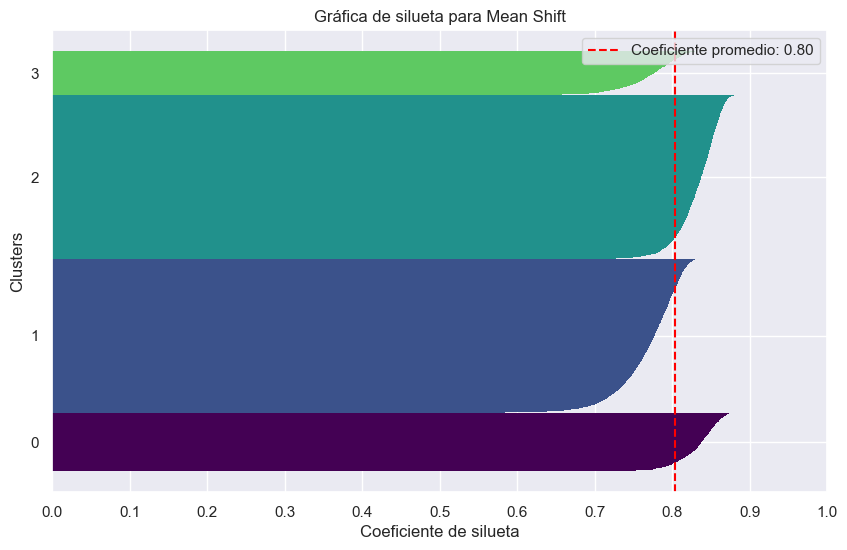

In [280]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def plot_silhouette(data, labels, ylabel='Clusters', xlabel='Coeficiente de silueta', title='Gráfica de silueta para Mean Shift'):
    
    cluster_labels = np.unique(labels)
    n_clusters = len(cluster_labels)
    silhouette_vals = silhouette_samples(data, labels, metric='euclidean')
    plt.figure(figsize=(10, 6))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.viridis(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    
    plt.axvline(silhouette_avg, color="red", linestyle="--", label=f'Coeficiente promedio: {silhouette_avg:.2f}')
    plt.yticks(yticks, cluster_labels)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.legend(loc='upper right')
    plt.show()

plot_silhouette(X_scaled, df_birch["Cluster"])

Aunque los algoritmos son distintos en su funcionamiento, en ciertos escenarios pueden converger a resultados similares:

BIRCH crea clusters basados en jerarquías y densidad de datos. Si los datos tienen patrones claros y BIRCH usa un umbral adecuado, generará clusters bien definidos.

Mean Shift identifica regiones de alta densidad y agrupa los puntos cercanos. Si los datos tienen concentraciones naturales de puntos, puede generar clusters similares a BIRCH.

Si se ajustaron bien los parámetros de ambos modelos, pueden converger a una solución muy parecida. Factores que pueden influir incluyen:

BIRCH: Un umbral adecuado y un buen tamaño de subclusters permiten que el algoritmo detecte estructuras de manera eficiente.
Mean Shift: Si el radio de vecindad (bandwidth) se ajusta correctamente, los clusters encontrados pueden coincidir con los de BIRCH.